In [1]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"

In [2]:
import os
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.8.0'

In [5]:
tf.keras.__version__

'2.8.0'

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
checklist = ["GPU", "CPU"]

for device in checklist:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print('device is available :',device)
    print('details :', out)
  else:
    print('device is not available :', device)

device is available : GPU
details : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
device is available : CPU
details : [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [15]:
x_train.dtype

dtype('uint8')

In [24]:
x_train_full = x_train[5000:]/ 255.0
x_validation = x_train[:5000]/ 255.0
y_train_full = y_train[5000:]
y_validation = y_train[:5000]
x_test = x_test /255.0

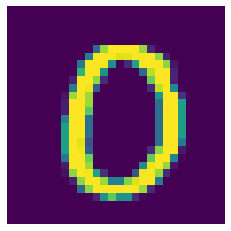

In [17]:
plt.imshow(x_train_full[10])
plt.axis('off')
plt.show()

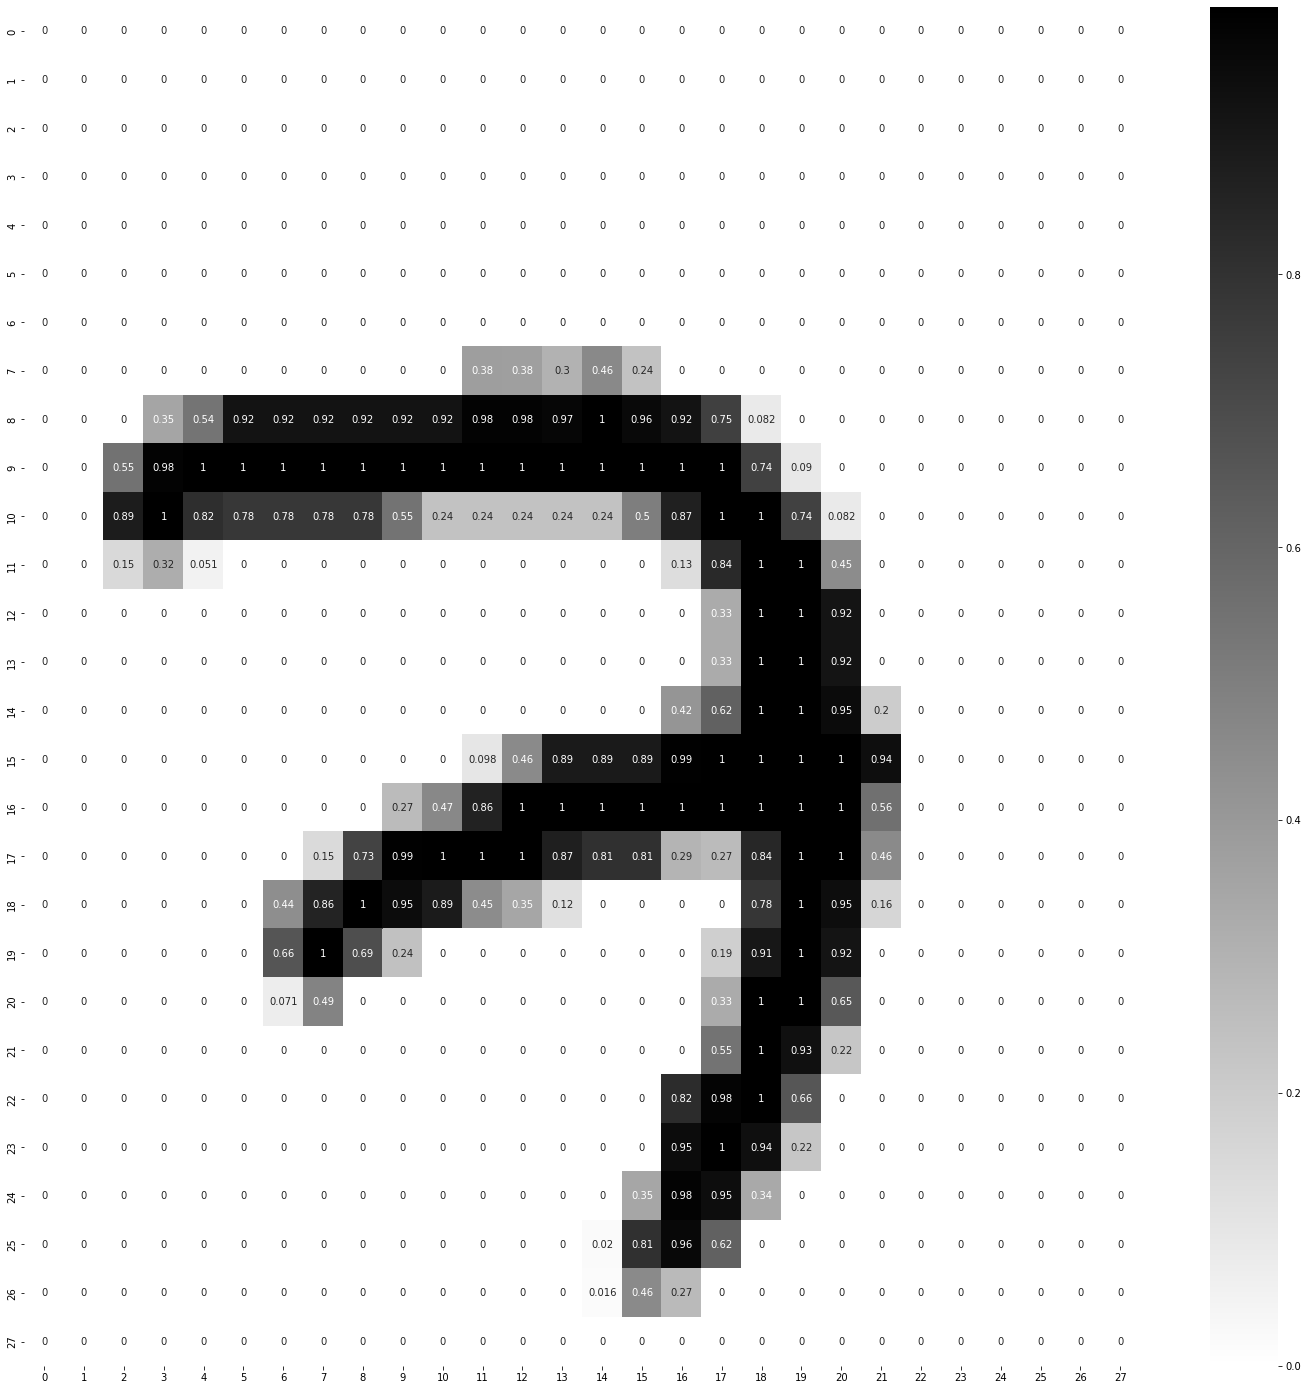

In [18]:
import seaborn as sns
plt.figure(figsize = (25,25))
sns.heatmap(x_train_full[0], annot=True, cmap = 'binary')

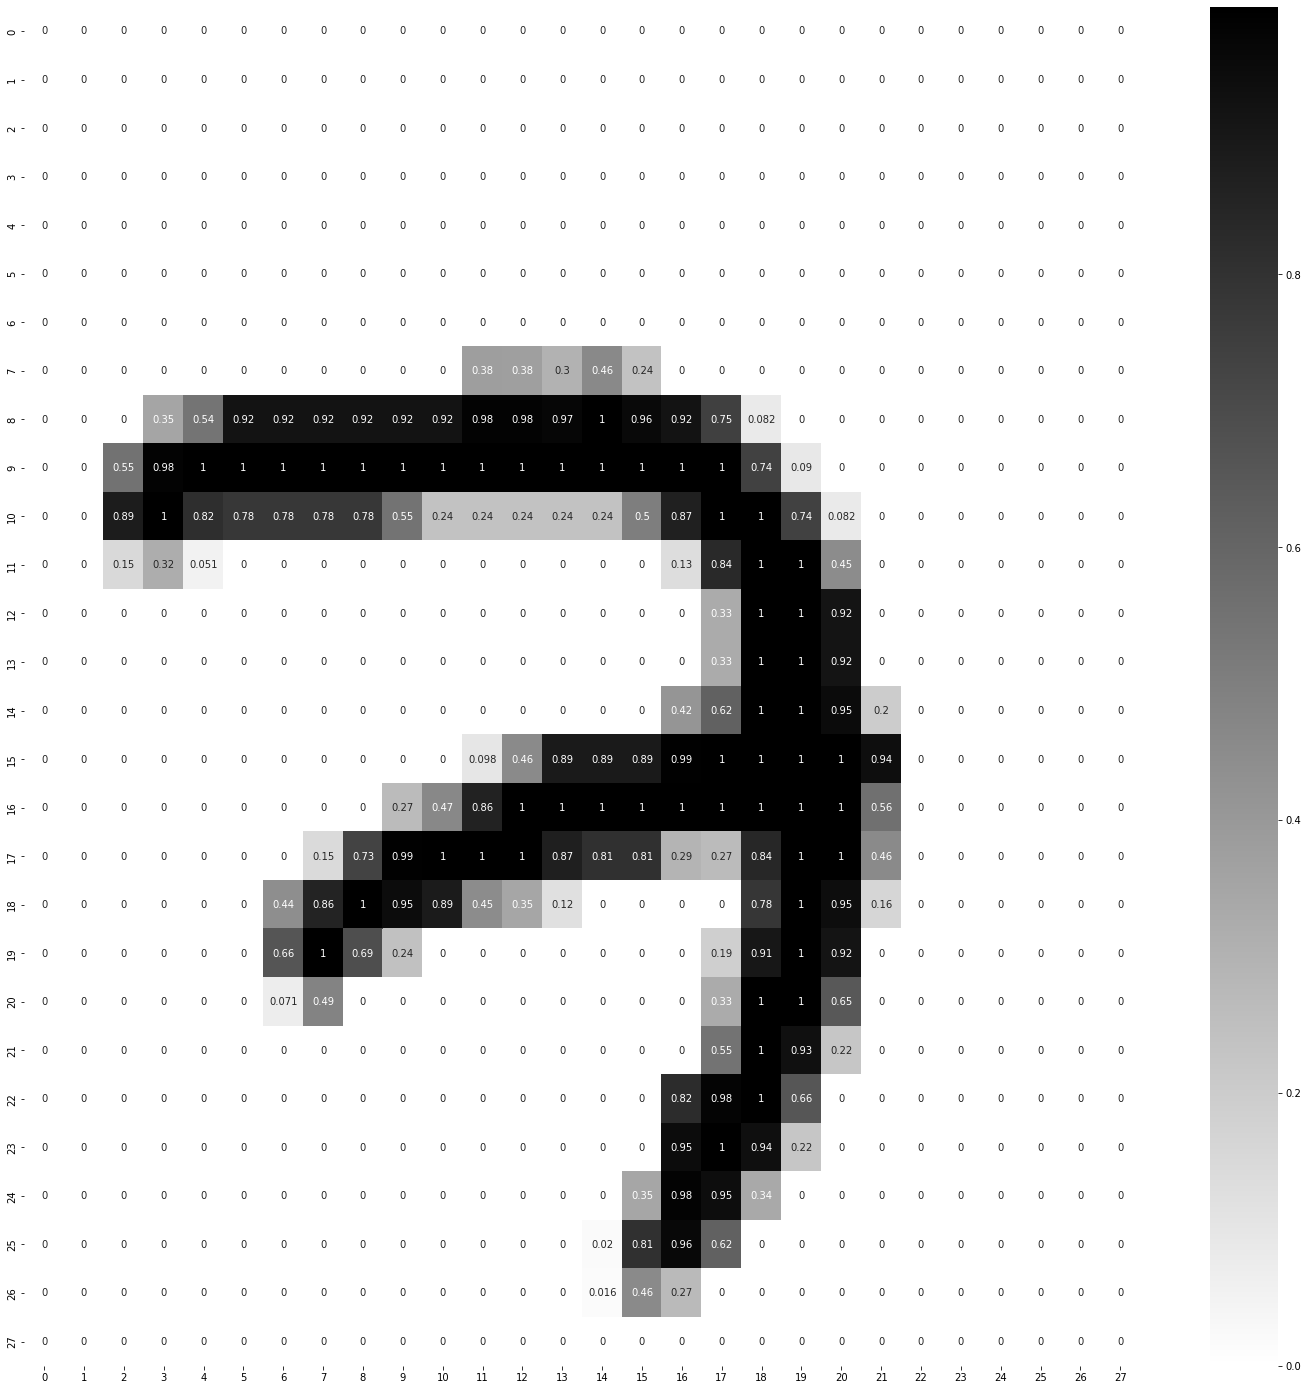

In [27]:
import seaborn as sns
plt.figure(figsize = (25,25))
sns.heatmap(x_train_full[0], annot=True, cmap = 'binary')

In [20]:
layers = [tf.keras.layers.Flatten(input_shape = [28,28], name ='inputlayer'),
         tf.keras.layers.Dense(300, activation = 'relu', name ='hiddenlayer1'),
         tf.keras.layers.Dense(100, activation = 'relu', name ='hiddenlayer2'),
         tf.keras.layers.Dense(10,  activation = 'softmax', name ='outputlayer')]

In [21]:
model_clf = tf.keras.models.Sequential(layers)

In [22]:
model_clf.layers

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [30]:
hidden1.get_weights()

[array([[ 0.02371624, -0.01439991, -0.05097712, ...,  0.0466778 ,
         -0.00669056, -0.02737254],
        [ 0.04619801,  0.06978942, -0.03655848, ..., -0.03720415,
         -0.05823892, -0.01619505],
        [ 0.0285837 , -0.00051027, -0.06387029, ...,  0.07083936,
          0.05306102, -0.00262947],
        ...,
        [ 0.00022985,  0.03665552, -0.00336054, ..., -0.01201103,
         -0.06951999, -0.01870093],
        [ 0.05886774,  0.01747118,  0.06636   , ...,  0.00402651,
         -0.00913017, -0.05848265],
        [ 0.02584008, -0.0170393 , -0.05490166, ..., -0.06420489,
          0.02202597,  0.06849375]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
print( ' shape :', weights.shape , "\n")

weights

 shape : (784, 300) 



array([[ 0.02371624, -0.01439991, -0.05097712, ...,  0.0466778 ,
        -0.00669056, -0.02737254],
       [ 0.04619801,  0.06978942, -0.03655848, ..., -0.03720415,
        -0.05823892, -0.01619505],
       [ 0.0285837 , -0.00051027, -0.06387029, ...,  0.07083936,
         0.05306102, -0.00262947],
       ...,
       [ 0.00022985,  0.03665552, -0.00336054, ..., -0.01201103,
        -0.06951999, -0.01870093],
       [ 0.05886774,  0.01747118,  0.06636   , ...,  0.00402651,
        -0.00913017, -0.05848265],
       [ 0.02584008, -0.0170393 , -0.05490166, ..., -0.06420489,
         0.02202597,  0.06849375]], dtype=float32)

In [33]:
print( ' shape :', biases.shape , "\n")

biases

 shape : (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
model_clf.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = "SGD",
                  metrics = ["accuracy"])

In [36]:
epochs = 30

validatio_set = (x_validation, y_validation)

history = model_clf.fit(x_train_full, y_train_full, epochs= epochs, validation_data = validatio_set)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6008 - accuracy: 0.8448 - val_loss: 0.3037 - val_accuracy: 0.9178
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9174 - val_loss: 0.2394 - val_accuracy: 0.9324
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2367 - accuracy: 0.9327 - val_loss: 0.2049 - val_accuracy: 0.9456
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2012 - accuracy: 0.9431 - val_loss: 0.1746 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1754 - accuracy: 0.9499 - val_loss: 0.1555 - val_accuracy: 0.9586
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1546 - accuracy: 0.9560 - val_loss: 0.1453 - val_accuracy: 0.9624
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1382 - accuracy: 0.9606 - val_loss: 0.1322 - val_accuracy:

In [40]:
import time
import os

def save_model(model_dir = 'trained_model'):
  os.makedirs(model_dir, exist_ok = True)
  filename = time.strftime("model_%Y_%M_%D_%H_%M_%S")
  model_path = os.path.join(model_dir, filename)
  print("model is saved :", filename)
  return model_path

In [41]:
unique_path = save_model()
unique_path

model is saved : model_2022_34_05/08/22_19_34_59


'trained_model/model_2022_34_05/08/22_19_34_59'

In [42]:
tf.keras.models.save_model(model_clf, unique_path)

INFO:tensorflow:Assets written to: trained_model/model_2022_34_05/08/22_19_34_59/assets


In [46]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [47]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.600837,0.844764,0.303711,0.9178
1,0.290448,0.917418,0.239449,0.9324
2,0.236689,0.932745,0.204916,0.9456
3,0.201243,0.943109,0.174585,0.9510
4,0.175379,0.949909,0.155519,0.9586
5,0.154621,0.956000,0.145282,0.9624
6,0.138186,0.960600,0.132230,0.9646
7,0.124627,0.964745,0.121466,0.9662
8,0.113291,0.968309,0.114828,0.9686
9,0.103348,0.970782,0.110391,0.9690


let's plot the graph for accuracy and loss

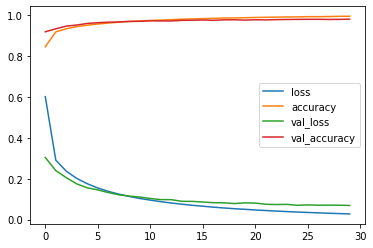

In [48]:
pd.DataFrame(history.history).plot()

evalute model on test dataset

In [49]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9780


[0.07330574095249176, 0.9779999852180481]

In [68]:
x_new = x_test[:3]
y_probability = model_clf.predict(x_new)
y_probability.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.994, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.003,
        0.   ]], dtype=float32)

let's test model on test dataset

In [69]:
y_pred = np.argmax(y_probability, axis=-1)
y_pred

array([7, 2, 1])

In [70]:
y_actual = y_test[:3]
y_actual

array([7, 2, 1], dtype=uint8)

y_test == y_pred ... successfully predicted

predicted : 7
actual : 7


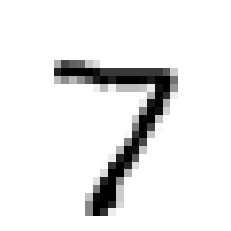

#######
predicted : 2
actual : 2


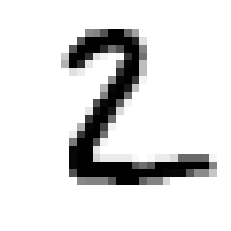

#######
predicted : 1
actual : 1


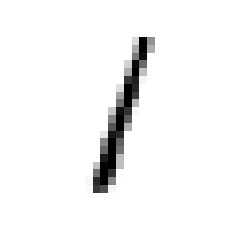

#######


In [75]:
for data, pred, actual in zip(x_new, y_pred, y_actual):
  plt.imshow(data, cmap = 'binary')
  print('predicted :', pred)
  print('actual :', actual)
  plt.axis('off')
  plt.show()
  print('#######')

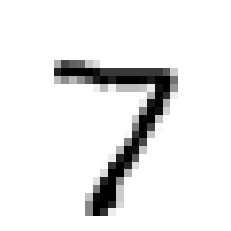

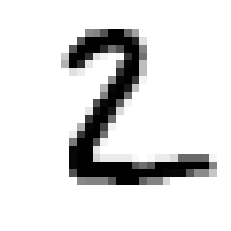

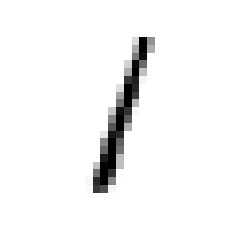

In [73]:
for i in x_new:
  plt.imshow(i, cmap = 'binary')
  plt.axis('off')
  plt.show()

In [77]:
loded_model = tf.keras.models.load_model(unique_path)
loded_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9780


[0.07330574095249176, 0.9779999852180481]